In [1]:
%%time
%run theory_basics.ipynb

CPU times: user 5min 48s, sys: 14min 51s, total: 20min 40s
Wall time: 2min 17s


In [2]:
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)

# Self-Consistency Equations

We are considering a periodic input current $u(x, t) = u(x, t + T)$ to a neural field over $x$ such that $u(x, t) = u(0, t+x)$.

Neural activity $r(x, t)$ evolves according to

$$
\tau_r \frac{\partial}{\partial t} r(x, t) = -r(x, t) + \varphi\big({u}(x, t) + \int_0^T w(x', t) r(x-x', t - \tau_d)dx'\big)
$$

$$
\tau_r \frac{\partial}{\partial t} r(x, t) = -r(x, t) + \varphi\big({u}(x, t) + [w(x', t)*{r}(x', t-\tau_d)](x)\big)
$$

with axonal delay $\tau_d$.

Neurons have synaptic weights $w(\Delta x, t)$ which evolve according to differential hebbian plasticity with regularization.

$$
\tau_w\frac{\partial}{\partial t} w(\Delta x, t) = \frac{1}{T} \int_0^T \dot{r}(x' + \Delta x, t) {r}(x', t-\tau_d)dx' - \lambda {w}(\Delta x, t)
$$
$$
\tau_w\frac{\partial}{\partial t} w(\Delta x, t) = \frac{1}{T}[\dot{r}(x', t) *' r(x', t-\tau_d)](\Delta x) - \lambda {w}(\Delta x, t)
$$

Here we use a modified convolution operator $*'$ which still preserves the convolution theorem by flipping the domain of the signal and the domain of the convolution. This corresponds to taking the complex conjugate of the fourier transformed kernel. Note that it does not preserve commutativity.

$$
\mathcal{F}([{f}(x) *' {g}(x)](x)) = \mathcal{F}([{f}(-x) * {g}(x)](-x)) = \overline{\overline{\mathcal{F}[{f}(x)]} {\mathcal{F}[{g}(x)]}} = \mathcal{F}[{f}(x)] \overline{\mathcal{F}[{g}(x)]}
$$

### TODO: use cross-correlation

$$
{\displaystyle {\mathcal {F}}\left\{f\star g\right\}={\overline {{\mathcal {F}}\left\{f\right\}}}\cdot {\mathcal {F}}\left\{g\right\},}
$$

When the system no longer learns, neural activity is periodic and the weights stay constant.
$$
\tau_w\frac{\partial}{\partial t} w(\Delta x, t) = 0
$$

using that $\mathcal{F}[f \star g] = \overline{\mathcal{F}[f]} \cdot \mathcal{F}[g]$

$$
\frac{1}{T}\mathcal{F}^{-1}\left[\overline{\mathcal{F}_x[r(x, t-\tau_d)]}\mathcal{F}_x\Big[\frac{\partial}{\partial t} {r}(x, t)\Big]\right] - \lambda {w}(\Delta x, t) = 0
$$

$$
\overline{\mathcal{F}_x[r(x, t-\tau_d)]}\mathcal{F}_x\left[\frac{\partial}{\partial t} {r}(x, t)\right] - \lambda T \mathcal{F}_x[{w}(\Delta x, t)] = 0
$$

Exploiting that $r(x,t+t) = r(t, t+x)$ and $\frac{\partial}{\partial t} r(x, t) = \frac{\partial}{\partial x} r(x, t)$:

$$
2 \pi i \xi \mathcal{F}_x[{r}(x, t)](\xi, y) \overline{e^{-2\pi i \xi\tau_d}} \overline{\mathcal{F}_x[r(x, t)](\xi, y)} - \lambda T \mathcal{F}_x[{w}(\Delta x, t)](\xi, y) = 0
$$

$$
{w}(\Delta x, t) = \mathcal{F}^{-1}\Bigg[\frac{2 \pi i \xi \overline{e^{-2\pi i \xi\tau_d}}}{\lambda T} |\mathcal{F}_x[{r}(x, t)]|^2\Bigg]
$$


$$
\Big(|\mathcal{F}_x[{r}(x, t)]|^2 = \frac{\lambda T}{2 \pi i \xi \overline{e^{-2\pi i \xi\tau_d}}} \mathcal{F}_x[{w}(\Delta x, t)]\Big)
$$

$$
\mathcal{F}^{-1}\left[\frac{2 \pi i \xi \overline{e^{-2\pi i \xi\tau_d}}}{\lambda T} |\mathcal{F}_x[{r}(x, t)]|^2\right]
$$

$$
\left[\frac{\mathcal{F}_x[\varphi(u(x, t))](\xi, t)}{\tau_r 2 \pi i \xi + 1}\right]
$$

$$
0 = 2 \pi i \xi \mathcal{F}_x[{r}(x, t)](\xi, y) \overline{e^{-2\pi i \xi\tau_d}} \overline{\mathcal{F}_x[r(x, t)](\xi, y)} - \lambda T \mathcal{F}_x[{w}(\Delta x, t)](\xi, y)
$$

$$
0 = 2 \pi \xi {e^{i(\frac{\pi}{2} + 2\pi \xi\tau_d)}} \mathcal{F}_x[{r}(x, t)](\xi, y)\overline{\mathcal{F}_x[r(x, t)](\xi, y)} - \lambda T \mathcal{F}_x[{w}(\Delta x, t)](\xi, y)
$$

We now take the Fourier transform of the network activity

$$
\mathcal{F}_x[\tau_r \frac{\partial}{\partial t} r(x, t)] = -\mathcal{F}_x[r(x, t)] + \mathcal{F}_x[\varphi\big({u}(x, t) + [w(\Delta x, t)*{r}(x, t-\tau_d)](x)\big)]
$$

$$
(\tau_r 2 \pi i \xi + 1)\mathcal{F}_x[r(x, t)] = \mathcal{F}_x[\varphi\big({u}(x, t) + [w(\Delta x, t)*{r}(x, t-\tau_d)](x)\big)]
$$

We assume that $f$ is a quickly saturating sigmoid $(\varphi(y) \approx 0$ for $y < -0.5$ and $\varphi(y) \approx 1$ for $y > 0.5)$ and $|u(x, t)| \gg |[w(\Delta x, t)*{r}(x, t-\tau_d)](x)| \gg 0$ during training:

$$
r(x, t) \approx \mathcal{F}^{-1}\Bigg[\frac{\mathcal{F}_x[\varphi\big({u}(x, t)\big)]}{\tau_r 2 \pi i \xi + 1}\Bigg]
$$

In [3]:
freqs = np.fft.fftfreq(N)
u_fft = np.fft.fft(u(t[-1] + theta, T))
phi_u_fft = np.fft.fft(phi(u(t[-1] + theta, T)))
w_fft = np.fft.fft(W[-1])
x_fft = np.fft.fft(X[-1])
x_interp_fft = np.fft.fft((X[-1]+X[-2])/2)
x_delay_fft = np.fft.fft(X[-1-delay_i])
#dx_fft = np.fft.fft(DX[-1])

In [4]:
from scipy.signal import periodogram

In [5]:
asdf = np.arange(0, 5, 100) + np.sin(np.linspace(0, 5, 100)) + np.random.randn(100)

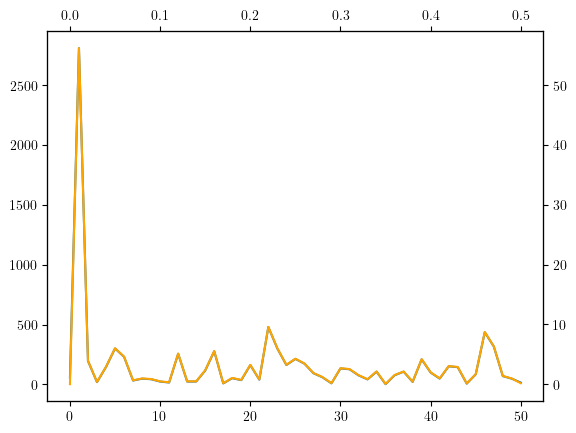

In [6]:
plt.plot((np.abs(np.fft.fft(asdf))**2)[:51])
plt.twinx()
plt.twiny()
plt.plot(*periodogram(asdf), c='orange')

In [7]:
def get_x_from_u(u_):
    return np.fft.ifft(np.fft.fft(phi(u_)) / (tau_x/dt * 2 * np.pi * 1j * freqs + 1)).real

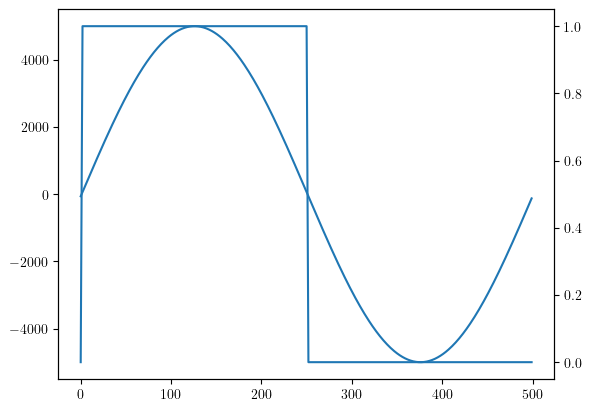

In [8]:
plt.plot(u(t[-1] + theta, T))
plt.twinx()
plt.plot(phi(u(t[-1] + theta, T)))

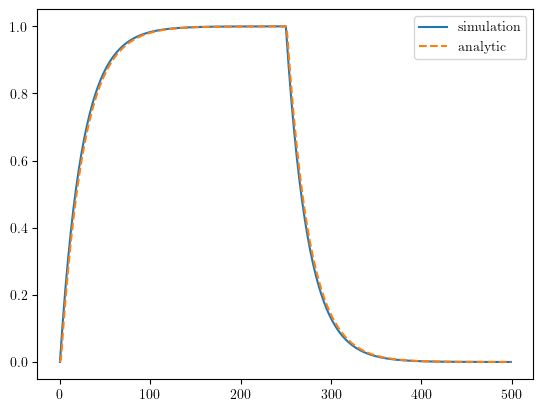

In [9]:
#plt.plot(X[-2]/2 + X[-1]/2, label='simulation')
plt.plot(X[-2], label='simulation')
plt.plot(get_x_from_u(u(t[-1] + theta, T)), linestyle='dashed', label='analytic')
plt.legend()

In [10]:
def get_w_from_x(x):
    freqs = np.fft.fftfreq(len(x))
    x_fft = np.fft.fft(x)
    w = (
        np.abs(x_fft)**2
        * 2*np.pi*1j*freqs
        # 0.5 interpolation: correction for discretization
        * np.conj(np.exp(-2*np.pi*1j*freqs*(delay_i-0.5)))
        / (lmbda*dt*len(x))
    )
    return np.fft.ifft(w).real

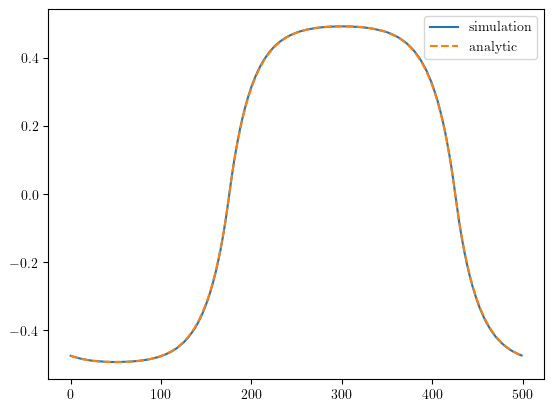

In [11]:
plt.plot(W[-1], label='simulation')
plt.plot(get_w_from_x(get_x_from_u(u(t[-1] + theta, T))), linestyle='dashed', label='analytic')
plt.legend()

# composite inputs

In [12]:
def u(t, T, scale=5000):
    return scale * np.sin(2 * np.pi * t / T)

def u2(t, T, scale=5000):
    return scale * (np.sin(2 * np.pi * t / T) + np.sin(2 * 2 * np.pi * t / T))

def u3(t, T, scale=5000):
    return scale * (np.cos(2 * np.pi / 2 / (np.sqrt(np.abs(np.mod(t, T)-(T/2))) + 1e-12)))

In [13]:
%%time
X_comp = []
w_comp = []

for u_ in (u, u2, u3):
    w_ = 0.005 * np.random.randn(N)
    X, w_ = simulate(dt, N, T, t, theta, alpha, beta, delay_i, lmbda, w_, get_dw_prime_mean, get_dx, f_I_conv_circ_fft, phi, u_, full_info=False)
    X_comp.append(X)
    w_comp.append(w_)

CPU times: user 1min 53s, sys: 9.65 ms, total: 1min 53s
Wall time: 1min 55s


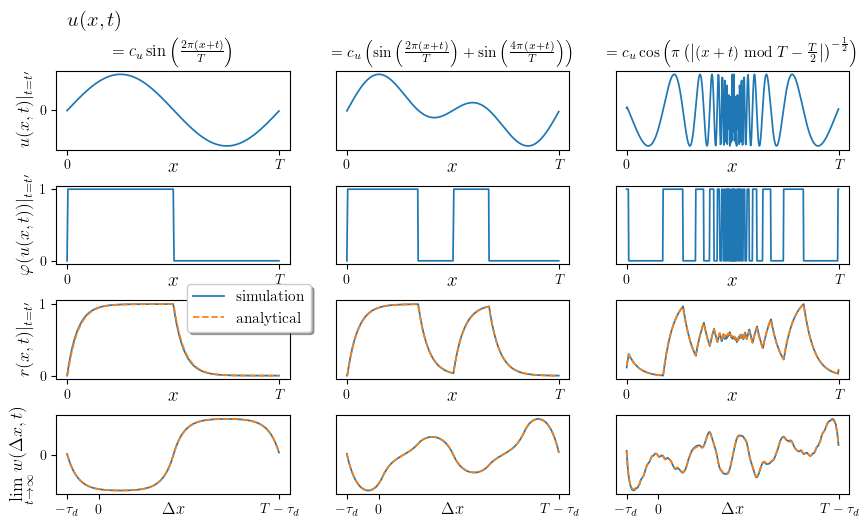

In [14]:
fig, axes = plt.subplots(4, 3, sharex=False, sharey=False, figsize=(8.5, 5))
lw = 1.25
fs = 13
labelpad=-10
i = -1
for j, u_ in enumerate((u, u2, u3)):
    #axes[0, j].plot(t[:N], (u_(t[:N], T)), lw=lw)
    #axes[0, j].set_xlabel('time (s)')
    axes[0, j].plot(u_(t[i] + theta, T), lw=lw)
    axes[0, j].set_xlabel('$x$', fontsize=fs+1, labelpad=labelpad)
    #axes[1, j].plot(t[:N], phi(u_(t[:N], T)), lw=lw)
    #axes[1, j].set_xlabel('time (s)')
    axes[1, j].plot(phi(u_(t[i] + theta, T)), lw=lw)
    axes[1, j].set_xlabel('$x$', fontsize=fs+1, labelpad=labelpad)
    axes[2, j].plot(X_comp[j][i-1], label='simulation', lw=lw)
    axes[2, j].plot(get_x_from_u(u_(t[i]+theta, T)), linestyle='dashed', label='analytical', lw=lw)
    axes[2, j].set_xlabel('$x$', fontsize=fs+1, labelpad=labelpad)
    axes[3, j].plot(np.roll(w_comp[j], delay_i), label='simulation', lw=lw)
    #axes[3, j].plot(get_w_from_x(X_comp[j][i]), linestyle='dashed', lw=lw)
    axes[3, j].plot(np.roll(get_w_from_x(get_x_from_u(u_(t[i+1]+theta, T))), delay_i), linestyle='dashed', lw=lw)
    axes[3, j].set_xlabel('$\Delta x$', fontsize=fs-1, labelpad=labelpad)

fig.suptitle('$u(x, t)$', fontsize=fs+2, x=0.1, y=1.015)

title_pad = 10  # Adjust this value as needed for appropriate spacing
axes[0, 0].set_title(r'$= c_{u} \sin\left(\frac{2\pi (x + t)}{T}\right)$', fontsize=fs-1, pad=title_pad)
axes[0, 1].set_title(r'$= c_{u} \left(\sin\left(\frac{2\pi (x + t)}{T}\right) + \sin\left(\frac{4\pi (x + t)}{T}\right)\right)$', fontsize=fs-2, pad=title_pad)
axes[0, 2].set_title(r'$= c_{u} \cos\left(\pi \left(\left| (x + t) \bmod T - \frac{T}{2} \right|\right)^{-\frac{1}{2}}\right)$', fontsize=fs-2, pad=title_pad)

#axes[0, 0].set_ylabel("$u(x, t)|_{x=x'}$", fontsize=fs)
#axes[1, 0].set_ylabel(r"$\varphi(u(x, t))|_{x=x'}$", fontsize=fs)
axes[0, 0].set_ylabel("$u(x, t)|_{t=t'}$", fontsize=fs)
axes[1, 0].set_ylabel(r"$\varphi(u(x, t))|_{t=t'}$", fontsize=fs)
axes[2, 0].set_ylabel(r"$r(x, t)|_{t=t'}$", fontsize=fs)
axes[3, 0].set_ylabel(r'$\lim\limits_{t\to \infty} w(\Delta x, t)$', fontsize=fs)

axes[0, 0].set_yticks([0])
axes[1, 0].set_yticks([0, 1])
axes[2, 0].set_yticks([0, 1])
axes[3, 0].set_yticks([0])

for ax in axes[:-1].flatten():
    ax.set_xticks([0, N], [r'$0$', r'$T$'])

for ax in axes[-1].flatten():
    ax.set_xticks([0, delay_i, N], [r'$-\tau_d$', 0, r'$T-\tau_d$'])

for ax in axes[:, 1:].flatten():
    ax.set_yticks([])
#for ax in axes[[0, 2], :].flatten():
#    ax.set_xticks([])

handles, labels = axes[2, -1].get_legend_handles_labels()
plt.tight_layout(pad=0.0, h_pad=0.7, w_pad=2.4)
#plt.figlegend(handles, labels, ncol=3)
axes[2, 0].legend(handles, labels, loc='upper right', bbox_to_anchor=(1.125, 1.3), fancybox=True, shadow=True, ncol=1, fontsize=fs-2)
plt.savefig('../latex/images/input_driven_overview.pdf', bbox_inches='tight')